In [2]:
import pickle 
import math

import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn 

%matplotlib inline
plt.rcParams['font.family'] = "Noto Serif CJK JP"

with open('../../data/Hazumi_features/Hazumi1911_features_bert.pkl', mode='rb') as f:
    SS_ternary, TS_ternary, sentiment, third_sentiment, persona, third_persona, text, audio,\
    visual, vid = pickle.load(f, encoding='utf-8')

## 性格特性スコアの分布
箱ひげ図のプロット

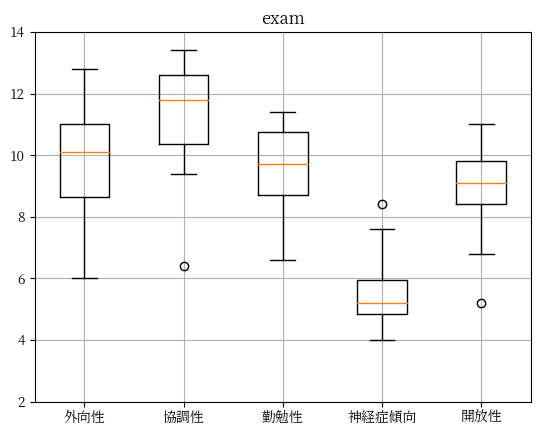

外向性 : high=22, low=4
協調性 : high=25, low=1
勤勉性 : high=24, low=2
神経症傾向 : high=1, low=25
開放性 : high=22, low=4


In [2]:
extraversion = [] 
agreeableness = [] 
conscientiousness = [] 
neuroticism = [] 
openness = [] 

for id in vid: 
    extraversion.append(third_persona[id][0]) 
    agreeableness.append(third_persona[id][1])
    conscientiousness.append(third_persona[id][2])
    neuroticism.append(third_persona[id][3]) 
    openness.append(third_persona[id][4]) 

data = (extraversion, agreeableness, conscientiousness, neuroticism, openness) 

fig, ax = plt.subplots() 

bp = ax.boxplot(data) 
ax.set_xticklabels(['外向性', '協調性', '勤勉性', '神経症傾向', '開放性'])

plt.title('exam') 
plt.ylim([2, 14])
plt.grid() 

plt.show()

traits = [extraversion, agreeableness, conscientiousness, neuroticism, openness] 
traits_name = ['外向性', '協調性', '勤勉性', '神経症傾向', '開放性']

for i, trait in enumerate(traits):
    low = 0 
    high = 0 
    for data in trait:
        if data >= 8.0:
            high += 1
        else:
            low += 1
    print(f"{traits_name[i]} : high={high}, low={low}")

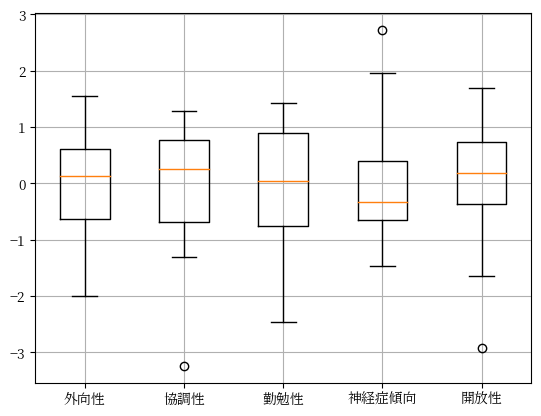

外向性 : high=15, low=11
協調性 : high=14, low=12
勤勉性 : high=13, low=13
神経症傾向 : high=10, low=16
開放性 : high=14, low=12


In [3]:
extraversion = [] 
agreeableness = [] 
conscientiousness = [] 
neuroticism = [] 
openness = [] 

df = pd.DataFrame.from_dict(third_persona, orient="index")
sc = StandardScaler()
df_sc = sc.fit_transform(df)
df_sc = pd.DataFrame(df_sc, index=vid)

for id in vid: 
    extraversion.append(df_sc.loc[id][0]) 
    agreeableness.append(df_sc.loc[id][1])
    conscientiousness.append(df_sc.loc[id][2])
    neuroticism.append(df_sc.loc[id][3]) 
    openness.append(df_sc.loc[id][4]) 

data = (extraversion, agreeableness, conscientiousness, neuroticism, openness) 

fig, ax = plt.subplots() 

bp = ax.boxplot(data) 
ax.set_xticklabels(['外向性', '協調性', '勤勉性', '神経症傾向', '開放性'])

plt.grid() 

plt.show()

traits = [extraversion, agreeableness, conscientiousness, neuroticism, openness] 
traits_name = ['外向性', '協調性', '勤勉性', '神経症傾向', '開放性']

for i, trait in enumerate(traits):
    low = 0 
    high = 0 
    for data in trait:
        if data >= 0.0:
            high += 1
        else:
            low += 1
    print(f"{traits_name[i]} : high={high}, low={low}")